<a href="https://colab.research.google.com/github/Menns0910/fluffy-tribble/blob/main/chapter05_fundamentals_of_ml_i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [16]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1) #(redundunt information 넣기)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1) #(redundunt information 넣기)

In [2]:
train_images.shape

(60000, 784)

In [11]:
train_images_with_noise_channels.shape

(60000, 1568)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [17]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7005 - loss: 1.0347 - val_accuracy: 0.8918 - val_loss: 0.3396
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9119 - loss: 0.2850 - val_accuracy: 0.9427 - val_loss: 0.1991
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9465 - loss: 0.1725 - val_accuracy: 0.9502 - val_loss: 0.1711
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9620 - loss: 0.1244 - val_accuracy: 0.9557 - val_loss: 0.1463
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9727 - loss: 0.0879 - val_accuracy: 0.9607 - val_loss: 0.1344
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9795 - loss: 0.0610 - val_accuracy: 0.9427 - val_loss: 0.1945
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9851 - loss: 0.0485 - val_accuracy: 0.9603 - val_loss: 0.1487
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9904 - loss: 0.0321 - val_accuracy: 0.

In [5]:
model = get_model()
history_original = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8618 - loss: 0.4832 - val_accuracy: 0.9543 - val_loss: 0.1584
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9610 - loss: 0.1354 - val_accuracy: 0.9690 - val_loss: 0.1065
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9768 - loss: 0.0819 - val_accuracy: 0.9729 - val_loss: 0.0964
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9820 - loss: 0.0603 - val_accuracy: 0.9732 - val_loss: 0.0906
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9882 - loss: 0.0423 - val_accuracy: 0.9765 - val_loss: 0.0780
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9907 - loss: 0.0330 - val_accuracy: 0.9763 - val_loss: 0.0826
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9933 - loss: 0.0246 - val_accuracy: 0.9787 - val_loss: 0.0774
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9944 - loss: 0.0198 - val_accuracy: 0.

**Plotting a validation accuracy comparison**

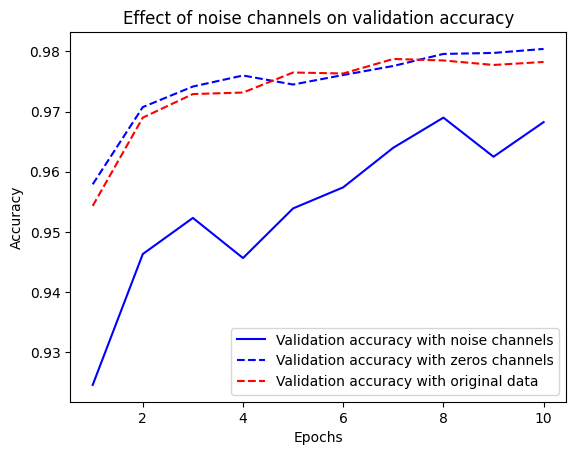

In [15]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_original = history_original.history["val_accuracy"] #
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_original, "r--",
         label="Validation accuracy with original data")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
#zero 넣은게 더 낫다, 그리고 zero는 우리 데이터에 harm을 끼치지 않음. noise는 harm을 끼침 (관계없는 info)

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [9]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels) #training garbage information

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0994 - loss: 2.3333 - val_accuracy: 0.1017 - val_loss: 2.3074
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1147 - loss: 2.2975 - val_accuracy: 0.1072 - val_loss: 2.3117
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1281 - loss: 2.2879 - val_accuracy: 0.1036 - val_loss: 2.3173
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1421 - loss: 2.2750 - val_accuracy: 0.0964 - val_loss: 2.3262
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1559 - loss: 2.2579 - val_accuracy: 0.1072 - val_loss: 2.3337
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1715 - loss: 2.2355 - val_accuracy: 0.1031 - val_loss: 2.3470
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1838 - loss: 2.2146 - val_accuracy: 0.1010 - val_loss: 2.3630
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2066 - loss: 2.1815 - val_accu

In [ ]:
#accuracy가 계속 증가함 근데 val_accuracy는 0.1에서 증가하지 않음 (Cost Function을 최소화하는 방향)
#딥러닝 모델은 모든것에 fit할 수 있다. 그것이 wrong information이더라도 (따라서 val_accuracy가 중요한 것!!)

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit (모델의 정확성? 이 오르지 않아요)

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate** (너무 높으면 update가 과하게 되어서 최소 mse로 수렴하지 않음)

In [18]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.), #learning rate 정상화필요
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3805 - loss: 2073.3149 - val_accuracy: 0.2093 - val_loss: 2.4047
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1694 - loss: 2.8348 - val_accuracy: 0.2980 - val_loss: 6.8381
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2038 - loss: 2.6527 - val_accuracy: 0.1924 - val_loss: 2.3041
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1752 - loss: 2.4675 - val_accuracy: 0.1879 - val_loss: 2.1759
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1933 - loss: 2.6808 - val_accuracy: 0.2381 - val_loss: 2.2245
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2023 - loss: 2.5248 - val_accuracy: 0.2145 - val_loss: 2.2475
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1983 - loss: 2.8487 - val_accuracy: 0.2205 - val_loss: 2.2560
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2042 - loss: 2.3104 - val_accuracy:

**The same model with a more appropriate learning rate**

In [19]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8343 - loss: 0.8071 - val_accuracy: 0.9524 - val_loss: 0.1660
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9640 - loss: 0.1235 - val_accuracy: 0.9601 - val_loss: 0.1494
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9760 - loss: 0.0874 - val_accuracy: 0.9663 - val_loss: 0.1499
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9798 - loss: 0.0797 - val_accuracy: 0.9674 - val_loss: 0.1682
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9843 - loss: 0.0619 - val_accuracy: 0.9686 - val_loss: 0.1678
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9868 - loss: 0.0498 - val_accuracy: 0.9682 - val_loss: 0.2054
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9875 - loss: 0.0500 - val_accuracy: 0.9725 - val_loss: 0.1872
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9899 - loss: 0.0421 - val_accuracy: 0.

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [20]:
model = keras.Sequential([layers.Dense(10, activation="softmax")]) #1 dense layer = 로지스틱 회귀와 같음
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7341 - loss: 1.0487 - val_accuracy: 0.9040 - val_loss: 0.3610
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8978 - loss: 0.3732 - val_accuracy: 0.9144 - val_loss: 0.3105
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9100 - loss: 0.3229 - val_accuracy: 0.9187 - val_loss: 0.2941
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9159 - loss: 0.3034 - val_accuracy: 0.9221 - val_loss: 0.2824
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9175 - loss: 0.2954 - val_accuracy: 0.9218 - val_loss: 0.2796
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9207 - loss: 0.2865 - val_accuracy: 0.9243 - val_loss: 0.2749
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9233 - loss: 0.2774 - val_accuracy: 0.9253 - val_loss: 0.2721
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9229 - loss: 0.2762 - val_accuracy: 0.

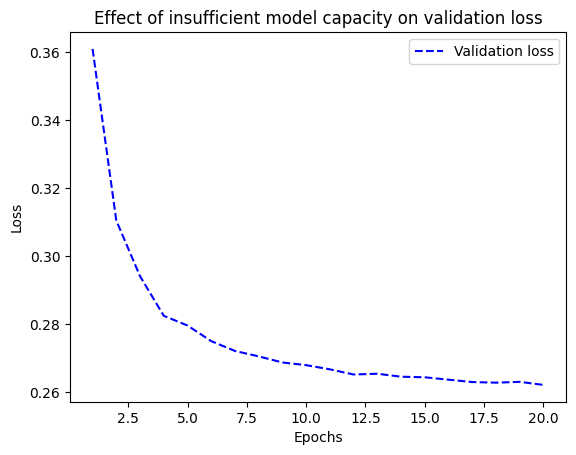

In [21]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
#overfitting situation이 발생하지 않음. but Loss가 0.26밑으로 내려가지도 않음

In [22]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"), #레이어 2개 추가
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8281 - loss: 0.6204 - val_accuracy: 0.9419 - val_loss: 0.2060
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9448 - loss: 0.1849 - val_accuracy: 0.9531 - val_loss: 0.1657
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9610 - loss: 0.1318 - val_accuracy: 0.9622 - val_loss: 0.1247
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9706 - loss: 0.0969 - val_accuracy: 0.9676 - val_loss: 0.1088
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9769 - loss: 0.0786 - val_accuracy: 0.9657 - val_loss: 0.1155
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9802 - loss: 0.0663 - val_accuracy: 0.9698 - val_loss: 0.1068
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9839 - loss: 0.0509 - val_accuracy: 0.9718 - val_loss: 0.1035
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9870 - loss: 0.0450 - val_accuracy: 0.

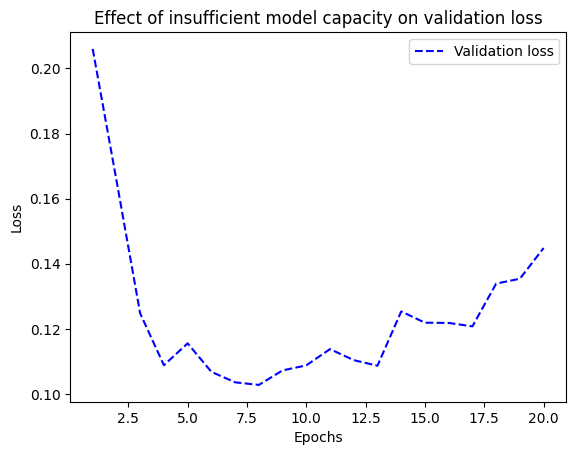

In [24]:
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
#overfitting 관찰가능, Loss도 0.1까지 내려감

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model** (네트워크 사이즈 조정)

In [25]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - accuracy: 0.6889 - loss: 0.5997 - val_accuracy: 0.8620 - val_loss: 0.3973
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8953 - loss: 0.3417 - val_accuracy: 0.8658 - val_loss: 0.3401
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9176 - loss: 0.2493 - val_accuracy: 0.8879 - val_loss: 0.2868
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9372 - loss: 0.1982 - val_accuracy: 0.8747 - val_loss: 0.3055
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9468 - loss: 0.1659 - val_accuracy: 0.8894 - val_loss: 0.2761
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9527 - loss: 0.1435 - val_accuracy: 0.8842 - val_loss: 0.2923
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9650 - loss: 0.1174 - val_accuracy: 0.8878 - val_loss: 0.2938
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accura

**Version of the model with lower capacity** (4-4-1)

In [26]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.6772 - loss: 0.6188 - val_accuracy: 0.8357 - val_loss: 0.4808
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8784 - loss: 0.4397 - val_accuracy: 0.8713 - val_loss: 0.3947
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9140 - loss: 0.3418 - val_accuracy: 0.8821 - val_loss: 0.3410
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9268 - loss: 0.2761 - val_accuracy: 0.8817 - val_loss: 0.3126
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9402 - loss: 0.2297 - val_accuracy: 0.8883 - val_loss: 0.2963
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9494 - loss: 0.1942 - val_accuracy: 0.8862 - val_loss: 0.2877
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9575 - loss: 0.1677 - val_accuracy: 0.8903 - val_loss: 0.2790
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9622 - loss: 0.1481 - val_accuracy: 0.8901 - 

**Version of the model with higher capacity** (512-512-1)

In [28]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.6249 - loss: 0.6468 - val_accuracy: 0.7983 - val_loss: 0.4383
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8636 - loss: 0.3352 - val_accuracy: 0.8188 - val_loss: 0.4113
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8949 - loss: 0.2503 - val_accuracy: 0.8890 - val_loss: 0.2680
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9347 - loss: 0.1771 - val_accuracy: 0.8916 - val_loss: 0.2774
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9485 - loss: 0.1422 - val_accuracy: 0.8890 - val_loss: 0.2981
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9501 - loss: 0.1385 - val_accuracy: 0.8862 - val_loss: 0.3110
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9797 - loss: 0.0638 - val_accuracy: 0.8765 - val_loss: 0.3768
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9797 - loss: 0.0763 - val_accuracy: 0.8849 - 

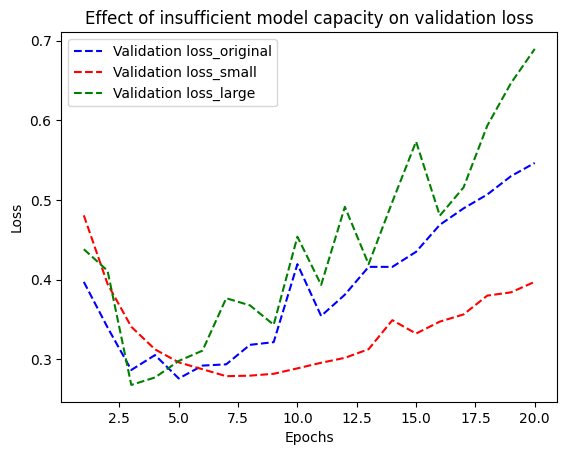

In [29]:
import matplotlib.pyplot as plt
val_loss_small = history_smaller_model.history["val_loss"]
val_loss_original = history_original.history["val_loss"]
val_loss_large = history_larger_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b--",
         label="Validation loss_original")
plt.plot(epochs, val_loss_small, "r--",
         label="Validation loss_small")
plt.plot(epochs, val_loss_large, "g--",
         label="Validation loss_large")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [30]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002), #L2 Regularization (restriction)
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - accuracy: 0.6345 - loss: 0.7159 - val_accuracy: 0.8423 - val_loss: 0.5098
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8849 - loss: 0.4521 - val_accuracy: 0.8746 - val_loss: 0.4064
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9094 - loss: 0.3499 - val_accuracy: 0.8770 - val_loss: 0.3881
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9220 - loss: 0.3059 - val_accuracy: 0.8885 - val_loss: 0.3609
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9366 - loss: 0.2718 - val_accuracy: 0.8888 - val_loss: 0.3622
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9399 - loss: 0.2621 - val_accuracy: 0.8671 - val_loss: 0.4080
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9402 - loss: 0.2549 - val_accuracy: 0.8816 - val_loss: 0.3759
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9511 - loss: 0.2377 - val_accuracy: 0.8603 - 

**Different weight regularizers available in Keras**

In [31]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [32]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4) #60% 데이터를 training, 40% 데이터를 validation으로 사용

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.5584 - loss: 0.6770 - val_accuracy: 0.6681 - val_loss: 0.6047
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7409 - loss: 0.5920 - val_accuracy: 0.8356 - val_loss: 0.5609
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8181 - loss: 0.5344 - val_accuracy: 0.8161 - val_loss: 0.5097
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8562 - loss: 0.4926 - val_accuracy: 0.8409 - val_loss: 0.4839
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8772 - loss: 0.4625 - val_accuracy: 0.8558 - val_loss: 0.4666
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8959 - loss: 0.4298 - val_accuracy: 0.8670 - val_loss: 0.4567
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9092 - loss: 0.4067 - val_accuracy: 0.8673 - val_loss: 0.4566
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9264 - loss: 0.3928 - val_accuracy: 0.8729 - 

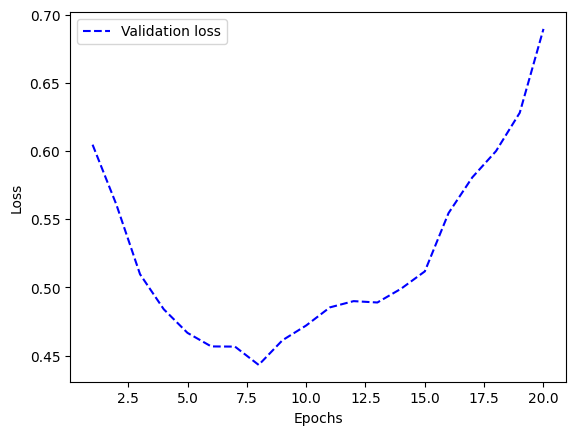

In [34]:
val_loss = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Summary